In [5]:
from transformers import MaskFormerFeatureExtractor, MaskFormerForInstanceSegmentation
from PIL import Image
import requests
import matplotlib.pyplot as plt



In [26]:
# load MaskFormer fine-tuned on COCO panoptic segmentation
feature_extractor = MaskFormerFeatureExtractor.from_pretrained("facebook/maskformer-swin-large-coco")
model = MaskFormerForInstanceSegmentation.from_pretrained("facebook/maskformer-swin-large-coco")

In [24]:
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open("./park.jpg")
print(image)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=259x194 at 0x2409A5C6790>


In [27]:
# url = "http://images.cocodataset.org/val2017/000000039769.jpg"
# image = Image.open(requests.get(url, stream=True).raw)
inputs = feature_extractor(images=image, return_tensors="pt")

outputs = model(**inputs)
# model predicts class_queries_logits of shape `(batch_size, num_queries)`
# and masks_queries_logits of shape `(batch_size, num_queries, height, width)`
class_queries_logits = outputs.class_queries_logits
masks_queries_logits = outputs.masks_queries_logits

# you can pass them to feature_extractor for postprocessing
result = feature_extractor.post_process_panoptic_segmentation(outputs, target_sizes=[image.size[::-1]])[0]
# we refer to the demo notebooks for visualization (see "Resources" section in the MaskFormer docs)
predicted_panoptic_map = result["segmentation"]

`label_ids_to_fuse` unset. No instance will be fused.


In [9]:
def ade_palette():
    """ADE20K palette that maps each class to RGB values."""
    return [[120, 120, 120], [180, 120, 120], [6, 230, 230], [80, 50, 50],
            [4, 200, 3], [120, 120, 80], [140, 140, 140], [204, 5, 255],
            [230, 230, 230], [4, 250, 7], [224, 5, 255], [235, 255, 7],
            [150, 5, 61], [120, 120, 70], [8, 255, 51], [255, 6, 82],
            [143, 255, 140], [204, 255, 4], [255, 51, 7], [204, 70, 3],
            [0, 102, 200], [61, 230, 250], [255, 6, 51], [11, 102, 255],
            [255, 7, 71], [255, 9, 224], [9, 7, 230], [220, 220, 220],
            [255, 9, 92], [112, 9, 255], [8, 255, 214], [7, 255, 224],
            [255, 184, 6], [10, 255, 71], [255, 41, 10], [7, 255, 255],
            [224, 255, 8], [102, 8, 255], [255, 61, 6], [255, 194, 7],
            [255, 122, 8], [0, 255, 20], [255, 8, 41], [255, 5, 153],
            [6, 51, 255], [235, 12, 255], [160, 150, 20], [0, 163, 255],
            [140, 140, 140], [250, 10, 15], [20, 255, 0], [31, 255, 0],
            [255, 31, 0], [255, 224, 0], [153, 255, 0], [0, 0, 255],
            [255, 71, 0], [0, 235, 255], [0, 173, 255], [31, 0, 255],
            [11, 200, 200], [255, 82, 0], [0, 255, 245], [0, 61, 255],
            [0, 255, 112], [0, 255, 133], [255, 0, 0], [255, 163, 0],
            [255, 102, 0], [194, 255, 0], [0, 143, 255], [51, 255, 0],
            [0, 82, 255], [0, 255, 41], [0, 255, 173], [10, 0, 255],
            [173, 255, 0], [0, 255, 153], [255, 92, 0], [255, 0, 255],
            [255, 0, 245], [255, 0, 102], [255, 173, 0], [255, 0, 20],
            [255, 184, 184], [0, 31, 255], [0, 255, 61], [0, 71, 255],
            [255, 0, 204], [0, 255, 194], [0, 255, 82], [0, 10, 255],
            [0, 112, 255], [51, 0, 255], [0, 194, 255], [0, 122, 255],
            [0, 255, 163], [255, 153, 0], [0, 255, 10], [255, 112, 0],
            [143, 255, 0], [82, 0, 255], [163, 255, 0], [255, 235, 0],
            [8, 184, 170], [133, 0, 255], [0, 255, 92], [184, 0, 255],
            [255, 0, 31], [0, 184, 255], [0, 214, 255], [255, 0, 112],
            [92, 255, 0], [0, 224, 255], [112, 224, 255], [70, 184, 160],
            [163, 0, 255], [153, 0, 255], [71, 255, 0], [255, 0, 163],
            [255, 204, 0], [255, 0, 143], [0, 255, 235], [133, 255, 0],
            [255, 0, 235], [245, 0, 255], [255, 0, 122], [255, 245, 0],
            [10, 190, 212], [214, 255, 0], [0, 204, 255], [20, 0, 255],
            [255, 255, 0], [0, 153, 255], [0, 41, 255], [0, 255, 204],
            [41, 0, 255], [41, 255, 0], [173, 0, 255], [0, 245, 255],
            [71, 0, 255], [122, 0, 255], [0, 255, 184], [0, 92, 255],
            [184, 255, 0], [0, 133, 255], [255, 214, 0], [25, 194, 194],
            [102, 255, 0], [92, 0, 255]]

In [28]:
result.keys()

dict_keys(['segmentation', 'segments_info'])

In [31]:

for segment in result['segments_info']:
  print(segment)
  print(model.config.id2label[segment["label_id"]])  

{'id': 1, 'label_id': 123, 'was_fused': False, 'score': 0.99257}
pavement-merged
{'id': 2, 'label_id': 13, 'was_fused': False, 'score': 0.996456}
bench
{'id': 3, 'label_id': 116, 'was_fused': False, 'score': 0.999751}
tree-merged
{'id': 4, 'label_id': 125, 'was_fused': False, 'score': 0.999935}
grass-merged
{'id': 5, 'label_id': 60, 'was_fused': False, 'score': 0.986503}
dining table
{'id': 6, 'label_id': 100, 'was_fused': False, 'score': 0.963538}
road
{'id': 7, 'label_id': 13, 'was_fused': False, 'score': 0.964069}
bench


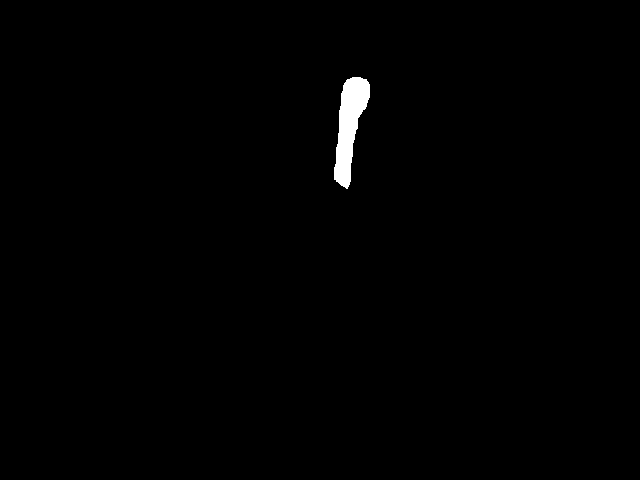

In [17]:
import numpy as np

mask = (result['segmentation'].numpy() == 4)
visual_mask = (mask * 255).astype(np.uint8)
visual_mask = Image.fromarray(visual_mask)
visual_mask

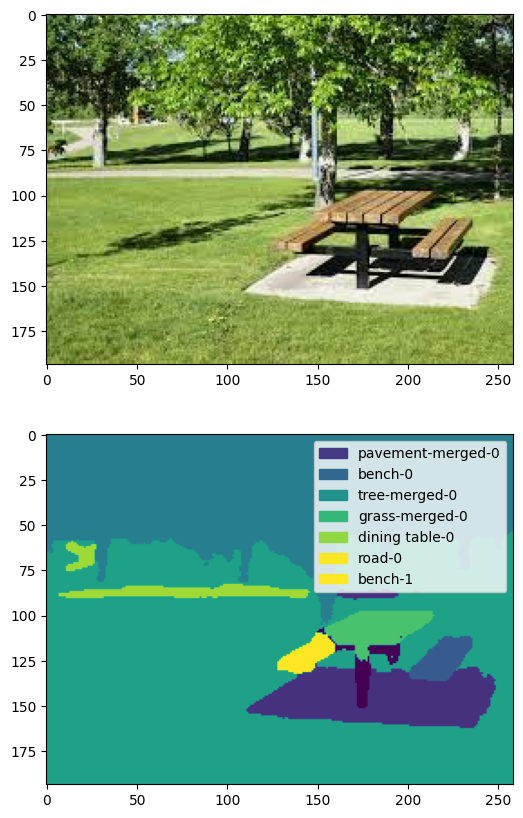

In [36]:
from collections import defaultdict
from matplotlib import cm
import matplotlib.patches as mpatches
import torch

def draw_panoptic_segmentation(segmentation, segments):
    # get the used color map
    viridis = cm.get_cmap('viridis', torch.max(segmentation))
    fig, ax = plt.subplots(2,1, figsize=(16,10))
    ax[1].imshow(segmentation)
    instances_counter = defaultdict(int)
    handles = []
    # for each segment, draw its legend
    for segment in segments:
        segment_id = segment['id']
        segment_label_id = segment['label_id']
        segment_label = model.config.id2label[segment_label_id]
        label = f"{segment_label}-{instances_counter[segment_label_id]}"
        instances_counter[segment_label_id] += 1
        color = viridis(segment_id)
        handles.append(mpatches.Patch(color=color, label=label))
        
    ax[1].legend(handles=handles)
    ax[0].imshow(image)
    # return fig

draw_panoptic_segmentation(result['segmentation'], result['segments_info'])

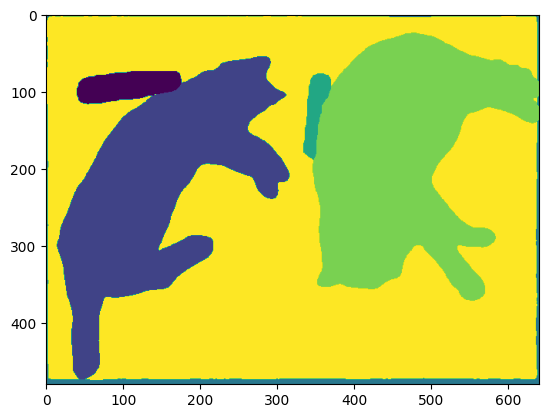

In [22]:
plt.imshow(result['segmentation'])

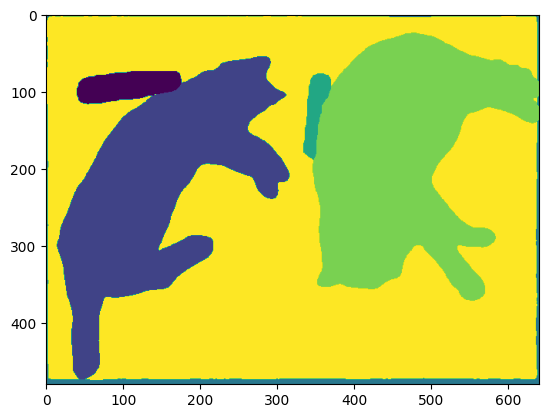

In [6]:
plt.imshow(predicted_panoptic_map)